<a href="https://colab.research.google.com/github/victoralmeida428/Data-Science/blob/main/Analises_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Estilizando Gráfico*


In [79]:
import seaborn as sns
import pandas as pd
import matplotlib as mpl


In [80]:
alucar = pd.read_csv('alucar.csv')

In [81]:
alucar.isna().sum()

mes       0
vendas    0
dtype: int64

In [82]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [83]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [84]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

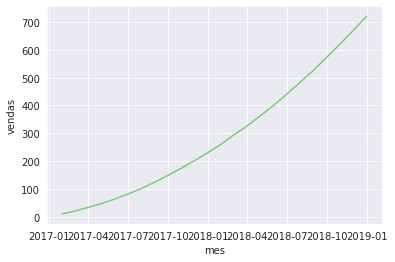

In [85]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)

Text(0, 0.5, 'vendas')

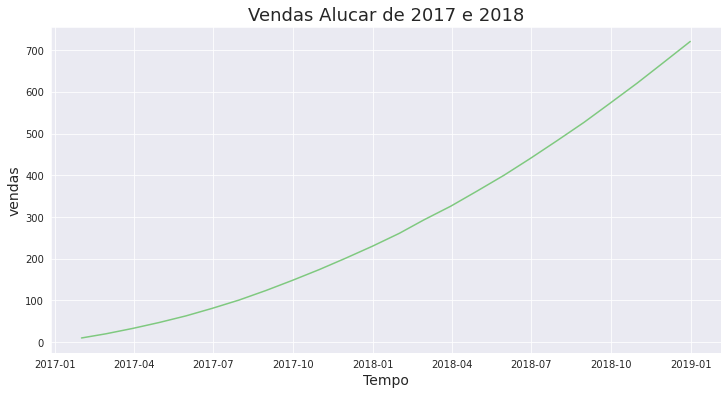

In [86]:
ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='center', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('vendas', fontsize=14)


# *Decompondo Vendas*

In [87]:
alucar['Aumento'] = alucar[['vendas']].diff()
alucar.head()

,mes,vendas,Aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [88]:
alucar['Aumento %'] = alucar['vendas'].pct_change()
alucar.head()

,mes,vendas,Aumento,Aumento %
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,1.000000
2,2017-03-31,33,13.0,0.650000
3,2017-04-30,47,14.0,0.424242
4,2017-05-31,63,16.0,0.340426


In [89]:
def plotar (titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='center', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

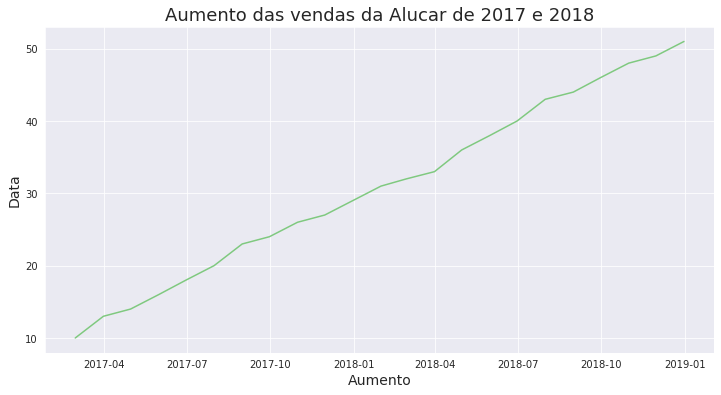

In [90]:
plotar ('Aumento das vendas da Alucar de 2017 e 2018', 'Aumento', 'Data','mes', 'Aumento', alucar)

In [91]:
alucar['aceleracao'] = alucar[['Aumento']].diff()


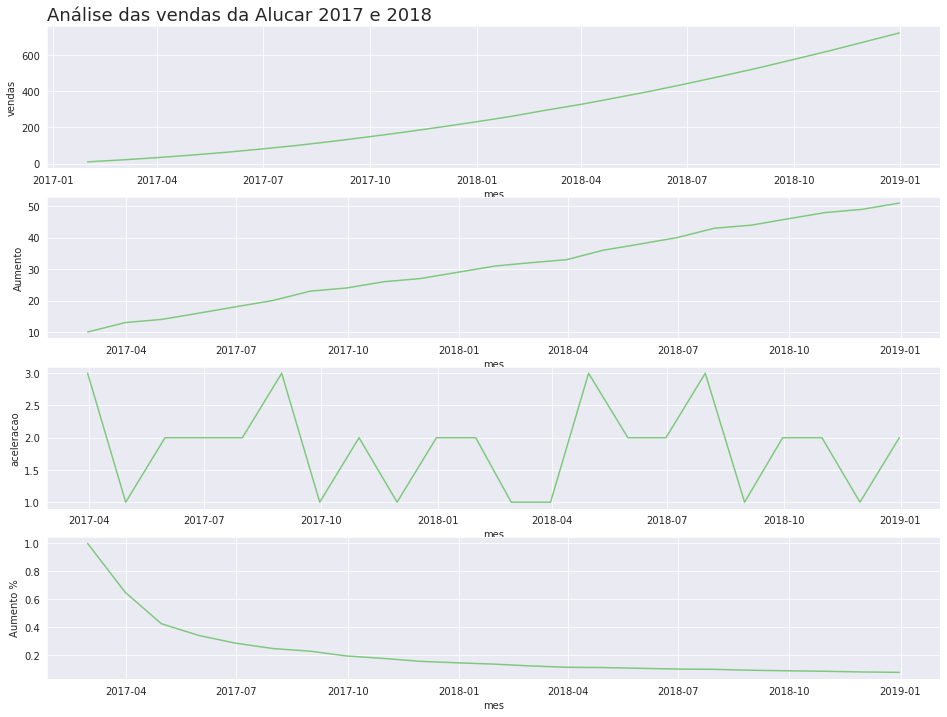

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
ax = plt.subplot(4,1,1)
ax.set_title('Análise das vendas da Alucar 2017 e 2018',fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(4,1,2)
sns.lineplot(x='mes', y='Aumento', data=alucar)
plt.subplot(4,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
plt.subplot(4,1,4)
sns.lineplot(x='mes', y='Aumento %', data=alucar)
ax=ax

In [93]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

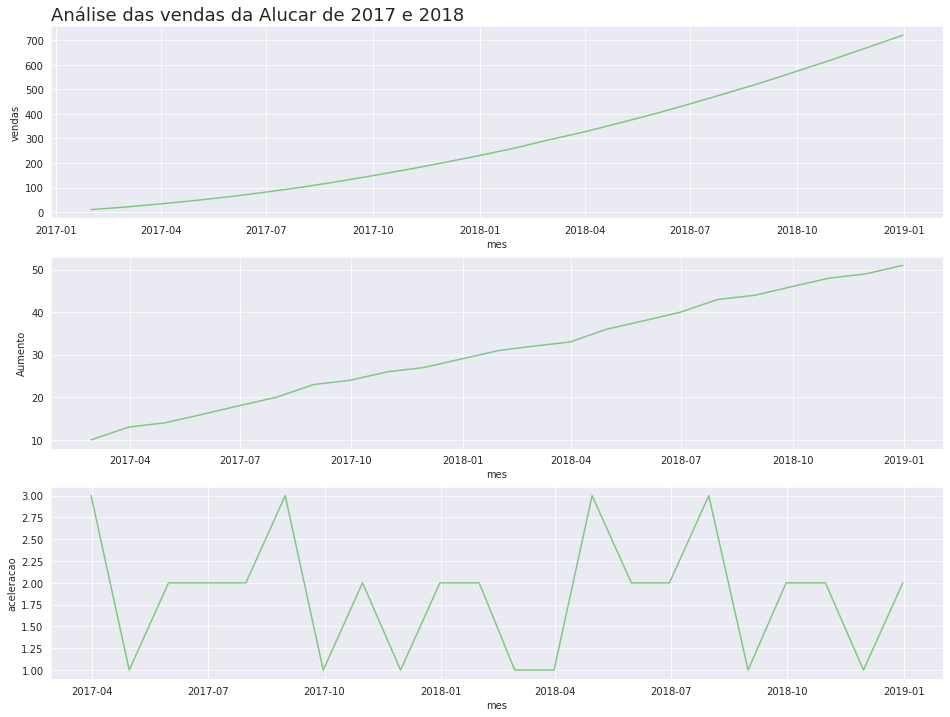

In [94]:
plot_comparacao('mes', 'vendas', 'Aumento', 'aceleracao',
                alucar, 'Análise das vendas da Alucar de 2017 e 2018') 

In [95]:
from pandas.plotting import autocorrelation_plot

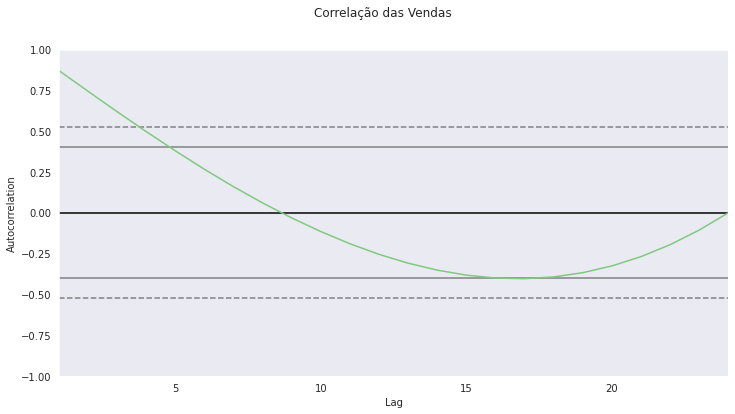

In [96]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas') 
autocorrelation_plot(alucar['vendas'])
ax=ax

# *Assinantes Alucar*

In [97]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes['aumento']= assinantes ['assinantes'].diff()
assinantes['aceleracao']= assinantes ['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


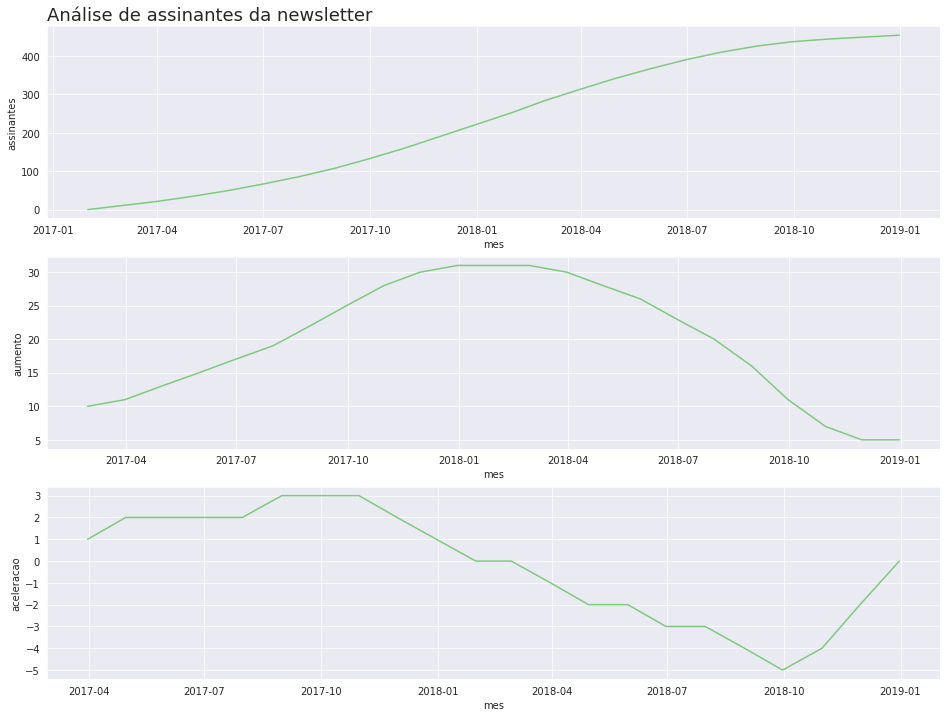

In [98]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

# *Chocolura - analisando as vendas*

In [99]:
chocolura = pd. read_csv('chocolura.csv')
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura['aumento'] = chocolura[['vendas']].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


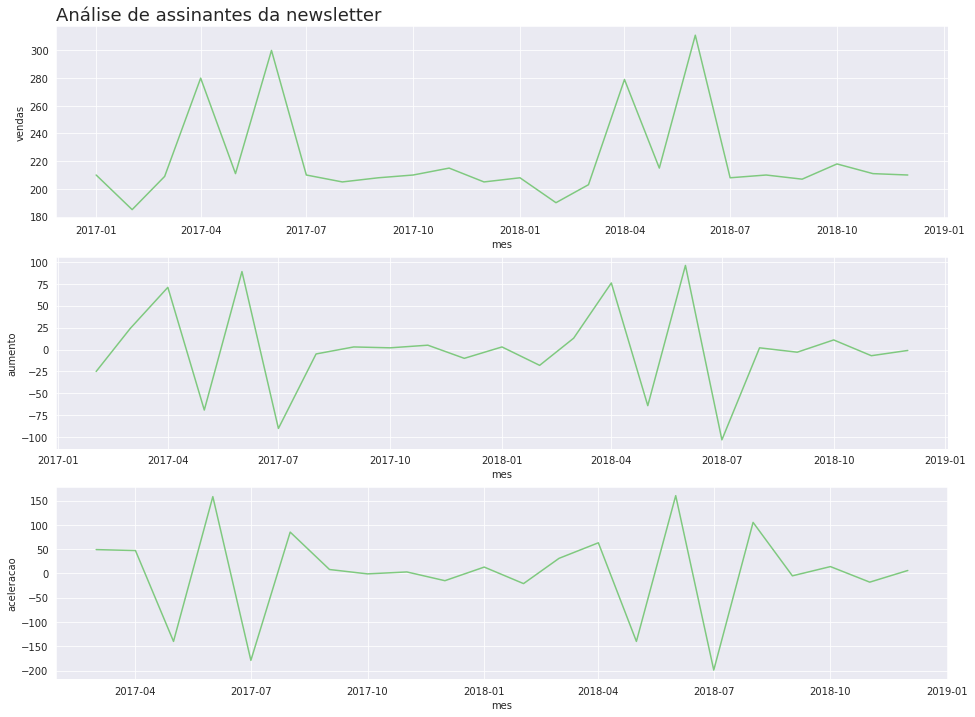

In [100]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',chocolura, 'Análise de assinantes da newsletter')

# *Investigando Sazonalidade*

In [101]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia['aumento']= vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao']= vendas_por_dia ['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


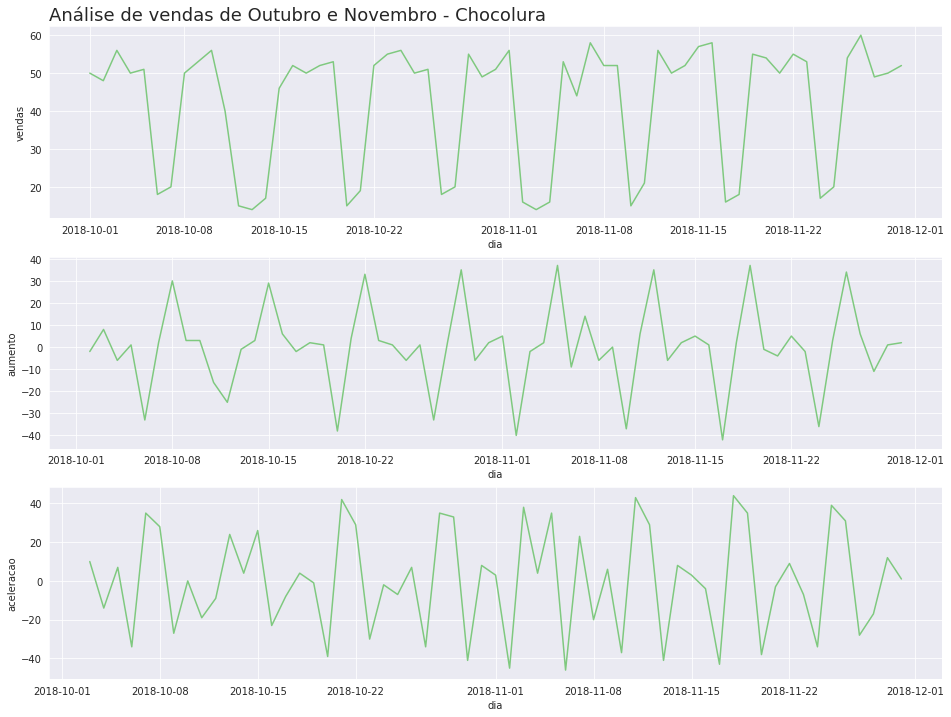

In [102]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas de Outubro e Novembro - Chocolura')

In [103]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia ['dia'].dt.day_name()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [104]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday' : 'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sábado', 'Sunday':'Domingo'}
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)

In [105]:
vendas_agrupada = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()
vendas_agrupada

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


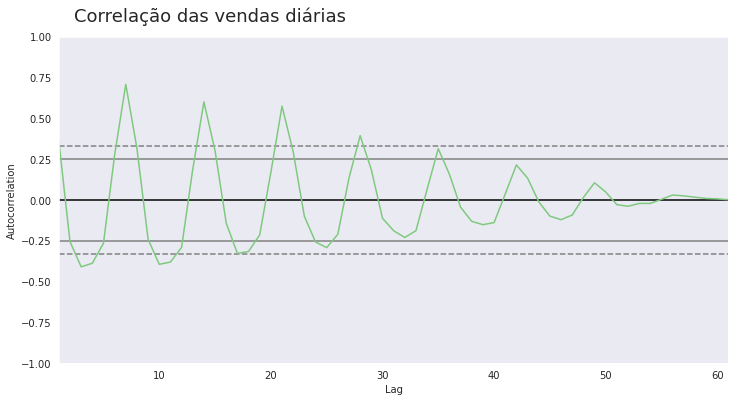

In [106]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

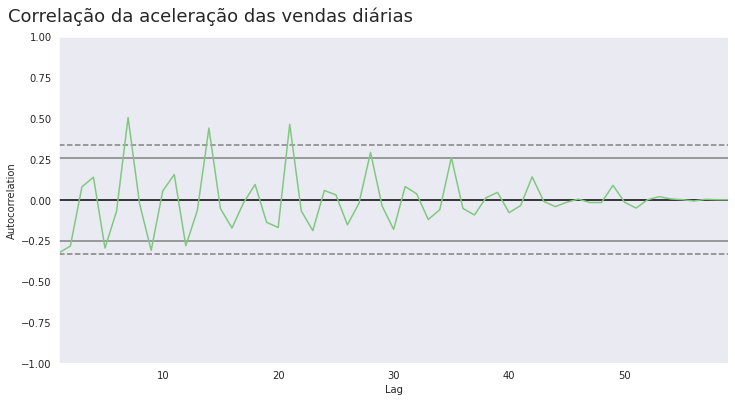

In [107]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# *NORMALIZAÇÃO*

In [108]:
cafelura = pd.read_csv('cafelura.csv')
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [109]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


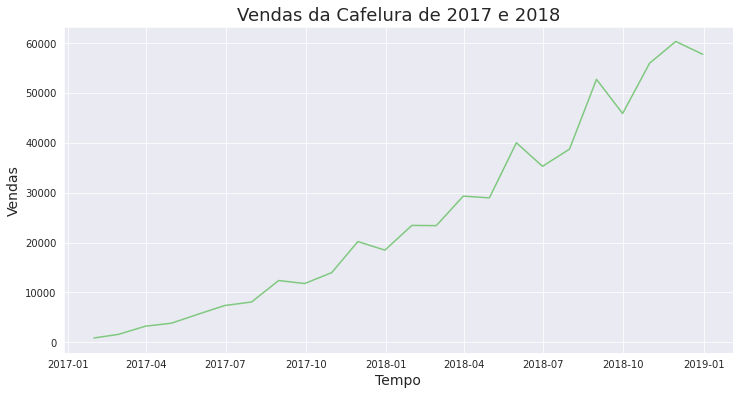

In [110]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [111]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [112]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [113]:
cafelura['vendas_normalizadas']= cafelura['vendas']/quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


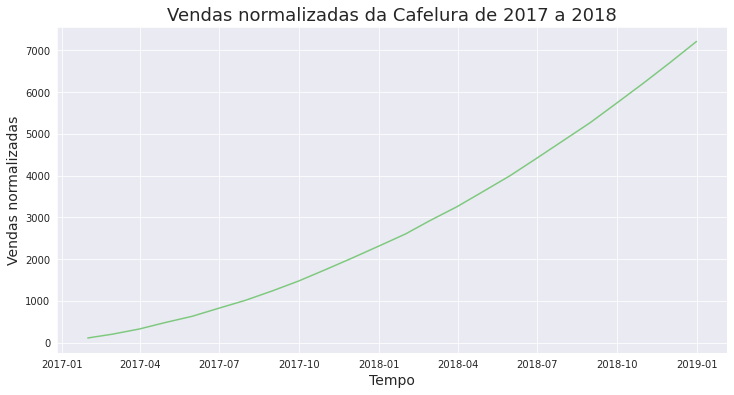

In [114]:
plotar('Vendas normalizadas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)

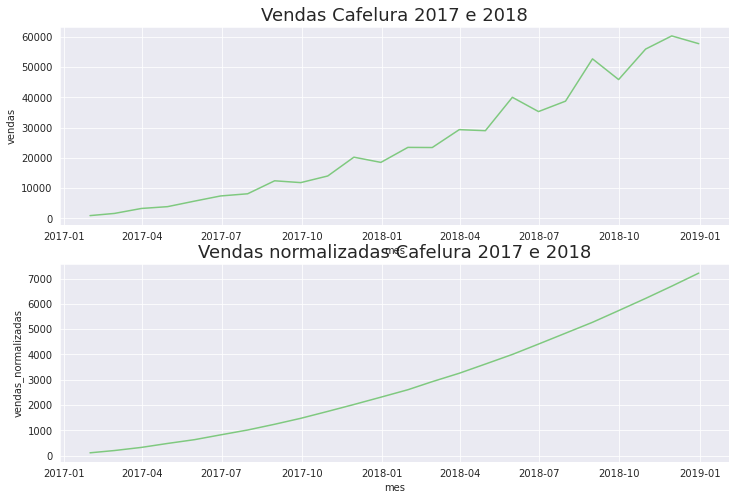

In [115]:
plt.figure(figsize=(12,8))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax 

# *Statsmodels*

In [116]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


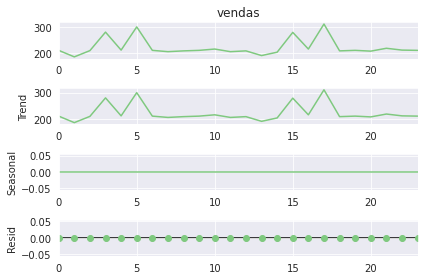

In [117]:
resultado = seasonal_decompose(chocolura['vendas'],  freq=1)
ax = resultado.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


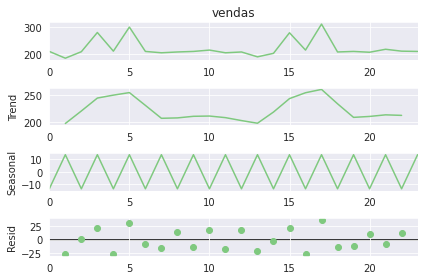

In [118]:
resultado = seasonal_decompose(chocolura['vendas'],  freq=2)
ax = resultado.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


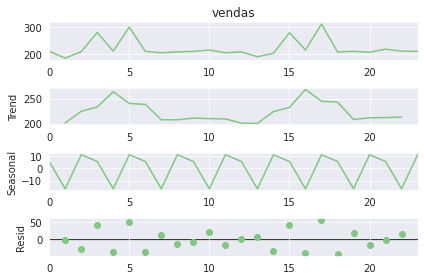

In [119]:
resultado = seasonal_decompose(chocolura['vendas'],  freq=3)
ax = resultado.plot()

In [120]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid
data = ({
       'observacao':observacao,
       'tendencia':tendencia, 
       'sazonalidade':sazonalidade,
       'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


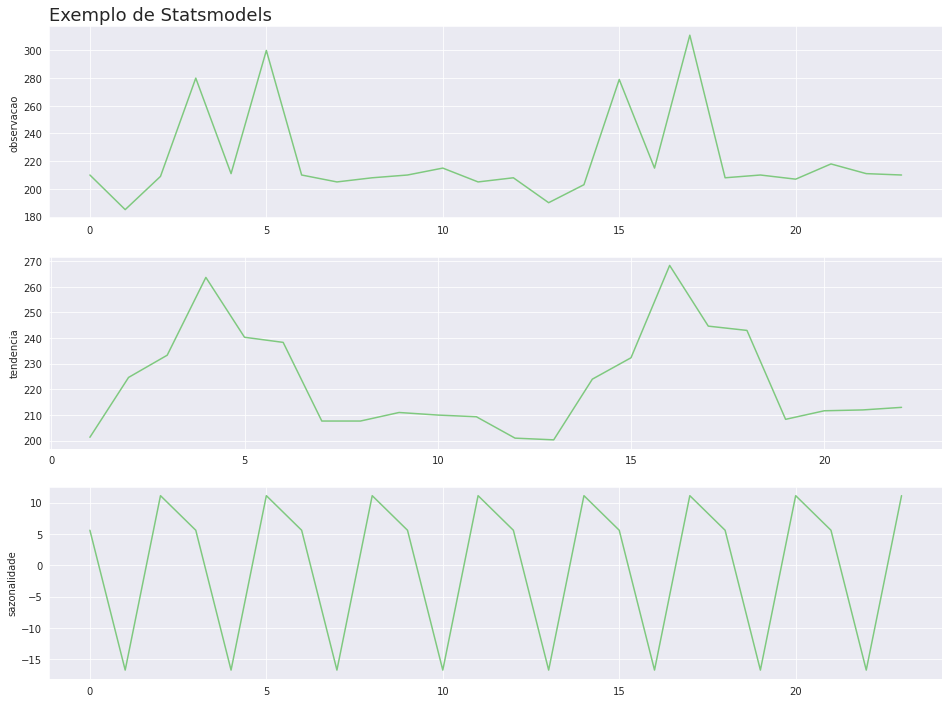

In [121]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

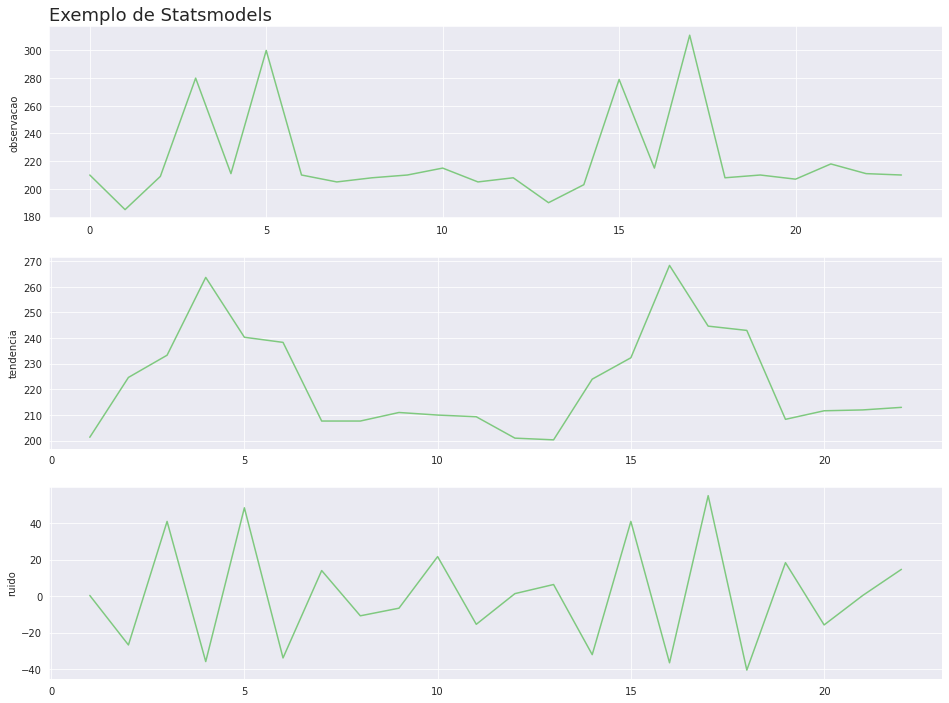

In [122]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'ruido', resultado, 'Exemplo de Statsmodels')

# *Ruídos e Média Móvel*

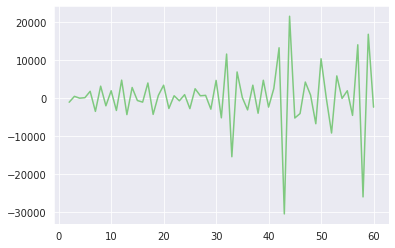

In [123]:
alucel = pd.read_csv('alucel.csv')
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel ['aumento'] = alucel ['vendas'].diff()
alucel ['aceleracao'] = alucel ['aumento'].diff()
alucel.head()
alucel['aceleracao'].plot()


In [124]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

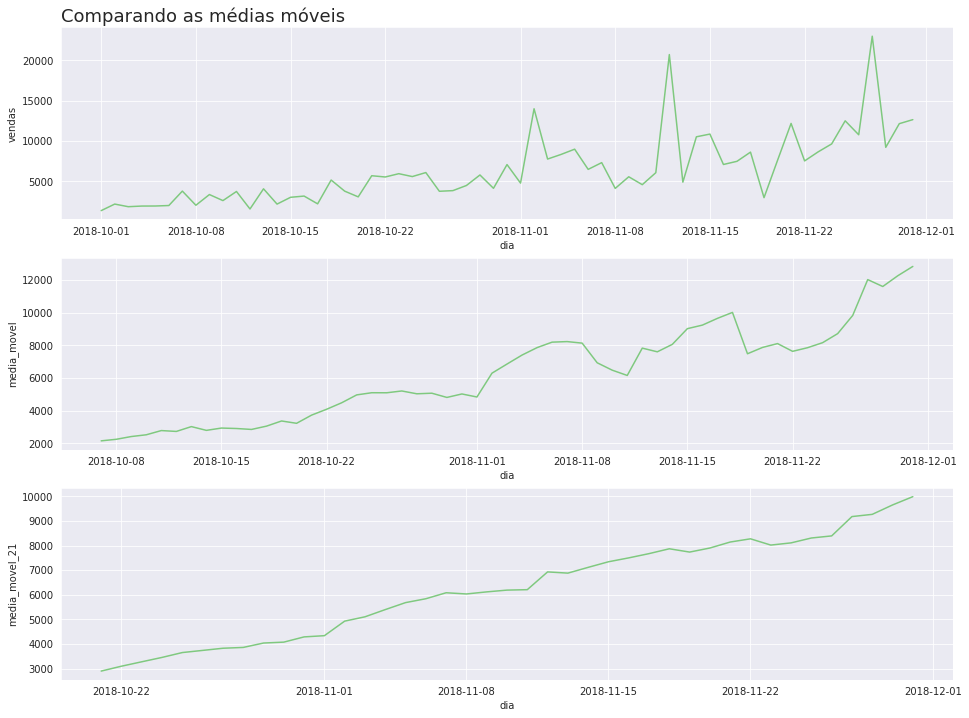

In [126]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as médias móveis')